In [8]:
from helpers import *
from plot_helpers import *
from sklearn.model_selection import train_test_split
from timer import Timer
from sklearn.decomposition import IncrementalPCA

In [2]:
index_ = "L30"

In [3]:
size = 30*30
samples = 1000

dtypes = dict([(i, np.int8) for i in range(1,size+1)])
dtypes[0]=np.float32

rawL30 = pd.read_csv("../data/DataBool_C_L30_MCS200000_WT20000.txt", sep=" ", header=None, dtype=dtypes)
# prepare data
X, Y, val_set = base_prepare(rawL30,
                             exportLabels = True,
                             normalize_data = False,
                             select_val_set=True,
                             nsamples=samples,
                             index_=index_,
                             save=False)


In [4]:
rawL30

,Temperature,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,900
0,4.02,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,1,1,1,1,1
1,4.02,0,1,1,1,0,0,1,1,0,...,1,1,0,0,0,1,1,1,0,1
2,4.02,0,1,1,0,1,0,1,0,1,...,1,1,1,1,1,0,0,0,0,1
3,4.02,1,1,1,1,1,0,0,1,1,...,0,1,0,1,1,0,1,0,1,1
4,4.02,1,1,1,1,1,1,1,0,1,...,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352171,0.52,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
352172,0.52,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
352173,0.52,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
352174,0.52,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, shuffle=True)
print("X_train_size: ", X_train.shape)
print("X_test_size: ", X_test.shape)
print("Y_train_size: ", Y_train.shape)
print("Y_test_size: ", Y_test.shape)

X_train_size:  (281740, 900)
X_test_size:  (70436, 900)
Y_train_size:  (281740, 2)
Y_test_size:  (70436, 2)


In [5]:
num_classes = 2
epochs = 100
batch_size = 400

input_shape = (X_train.shape[1],)

In [6]:
# Define Callbacks
# Initializing callbacks
path = f"./model_{index_}.h5"

# Saves the model in-between epochs when there is an improvement in "val_loss"
checkpoint = ModelCheckpoint(path,
                                monitor="val_loss",
                                mode="min",
                                save_best_only = True,
                                verbose=1)

# Stops training the model when no improvement in "val_loss" is observed after set "patience"
earlystop = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 6,
                              verbose = 1,
                              restore_best_weights = True)

# Monitors "val_loss" for a set 'patience', then the learning rate is reduced by a factor specified manually.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              patience = 4, verbose=1,
                              factor=0.3)


callbacks = [checkpoint, earlystop, reduce_lr]
# callbacks = [checkpoint, reduce_lr]


METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
]

In [8]:
model1 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model1.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model1.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 11s 13ms/step - loss: 9.2545 - categorical_accuracy: 0.9357 - val_loss: 0.1127 - val_categorical_accuracy: 0.9791

Epoch 00001: val_loss improved from inf to 0.11266, saving model to .\model_L30.h5
Epoch 2/100
705/705 [==============================] - 7s 11ms/step - loss: 0.1085 - categorical_accuracy: 0.9794 - val_loss: 0.0922 - val_categorical_accuracy: 0.9829

Epoch 00002: val_loss improved from 0.11266 to 0.09224, saving model to .\model_L30.h5
Epoch 3/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0921 - categorical_accuracy: 0.9819 - val_loss: 0.0845 - val_categorical_accuracy: 0.9820

Epoch 00003: val_loss improved from 0.09224 to 0.08454, saving model to .\model_L30.h5
Epoch 4/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0853 - categorical_accuracy: 0.9827 - val_loss: 0.0808 - val_categorical_accuracy: 0.9818

Epoch 00004: val_loss improved from 0.08454 to 0.08077, saving mod

705/705 [==============================] - 8s 11ms/step - loss: 0.0621 - categorical_accuracy: 0.9842 - val_loss: 0.0608 - val_categorical_accuracy: 0.9838

Epoch 00035: val_loss did not improve from 0.06072
Epoch 36/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0595 - categorical_accuracy: 0.9851 - val_loss: 0.0607 - val_categorical_accuracy: 0.9836

Epoch 00036: val_loss did not improve from 0.06072
Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping
Elapsed time: 280.1819 seconds


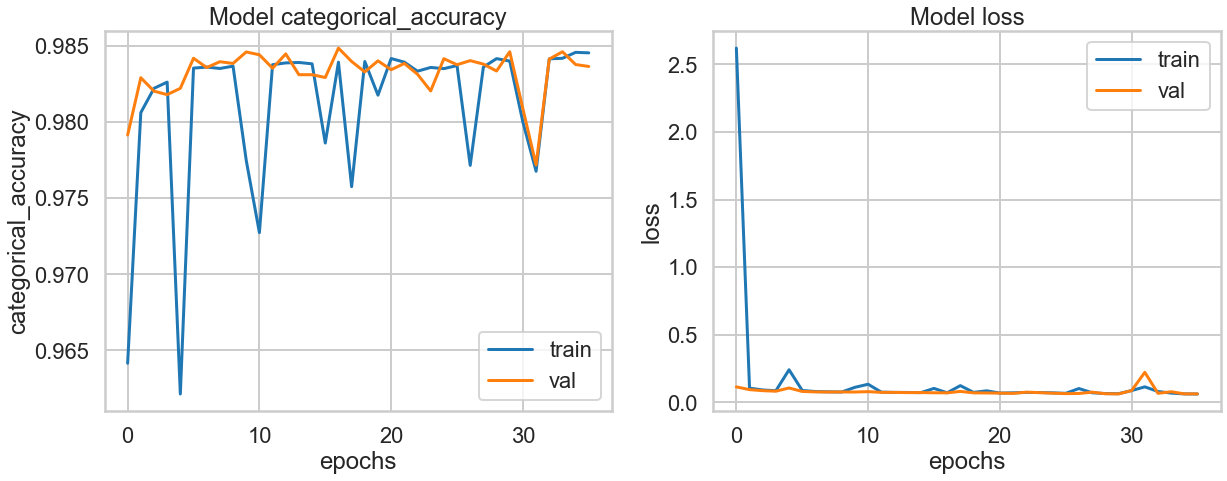

In [10]:
def plot_history(history, metric_names=["categorical_accuracy", "loss"], filename = "", figsize=(20, 7)):
    """
    plot and saves history from model history
    """
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.ravel()
    historyDataFrame = pd.DataFrame()
    metrics = metric_names
    for i, met in enumerate(metrics):
        historyDataFrame[met] = history.history[met]
        historyDataFrame["val_" + met] = history.history["val_" + met]
        ax[i].plot(history.history[met])
        ax[i].plot(history.history["val_" + met])
        ax[i].set_title("Model {}".format(met))
        ax[i].set_xlabel("epochs")
        ax[i].set_ylabel(met)
        ax[i].legend(["train", "val"])
    if filename:
        historyDataFrame.to_csv(filename)

        
plot_history(history)

In [12]:
val_loss, val_acc = model1.evaluate(x=X_test, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 6ms/step - loss: 0.0607 - categorical_accuracy: 0.9846
Validation loss: 0.0607
Validation accuracy: 0.985


In [13]:
df_pred30 = generate_predictions(val_set, model1, f"predictions_{index_}.csv", only_mean=False)

440/440 [==============================] - 1s 3ms/step


# PCA test - dimensionality reduction to 2 components

In [14]:

pca = IncrementalPCA(2)
pca.fit(X_train)

IncrementalPCA(n_components=2)

In [15]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
X_train_pca = X_train_pca.astype(np.float32)
X_test_pca = X_test_pca.astype(np.float32)

input_shape = (X_train_pca.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 8s 10ms/step - loss: 4.0910 - categorical_accuracy: 0.9778 - val_loss: 0.0895 - val_categorical_accuracy: 0.9786

Epoch 00001: val_loss did not improve from 0.06072
Epoch 2/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0854 - categorical_accuracy: 0.9816 - val_loss: 0.0766 - val_categorical_accuracy: 0.9837

Epoch 00002: val_loss did not improve from 0.06072
Epoch 3/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0760 - categorical_accuracy: 0.9817 - val_loss: 0.0712 - val_categorical_accuracy: 0.9780

Epoch 00003: val_loss did not improve from 0.06072
Epoch 4/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0694 - categorical_accuracy: 0.9829 - val_loss: 0.0690 - val_categorical_accuracy: 0.9772

Epoch 00004: val_loss did not improve from 0.06072
Epoch 5/100
705/705 [==============================] - 7s 9ms/step - loss: 0.0667 - categorical_accuracy: 0.9827 - val_loss

In [17]:
val_loss, val_acc = model2.evaluate(x=X_test_pca, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0491 - categorical_accuracy: 0.9848
Validation loss: 0.0491
Validation accuracy: 0.985


In [18]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca = pca.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred30_pca = generate_predictions(val_set, val_set_pca, model2, f"predictions_{index_}_PCA.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


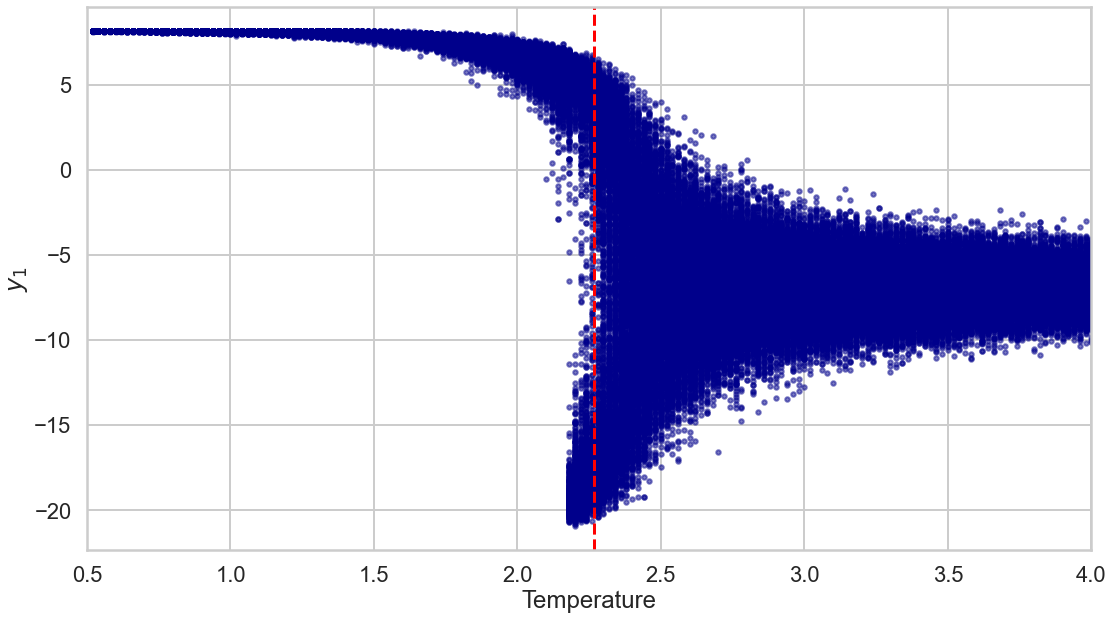

In [19]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,0], s=20, color="darkblue", alpha=0.5)
ax.set_ylabel(r"$y_1$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="red")
plt.savefig(f"pca_{index_}_1st_comp_on_temperature.svg", bbox_inches="tight")

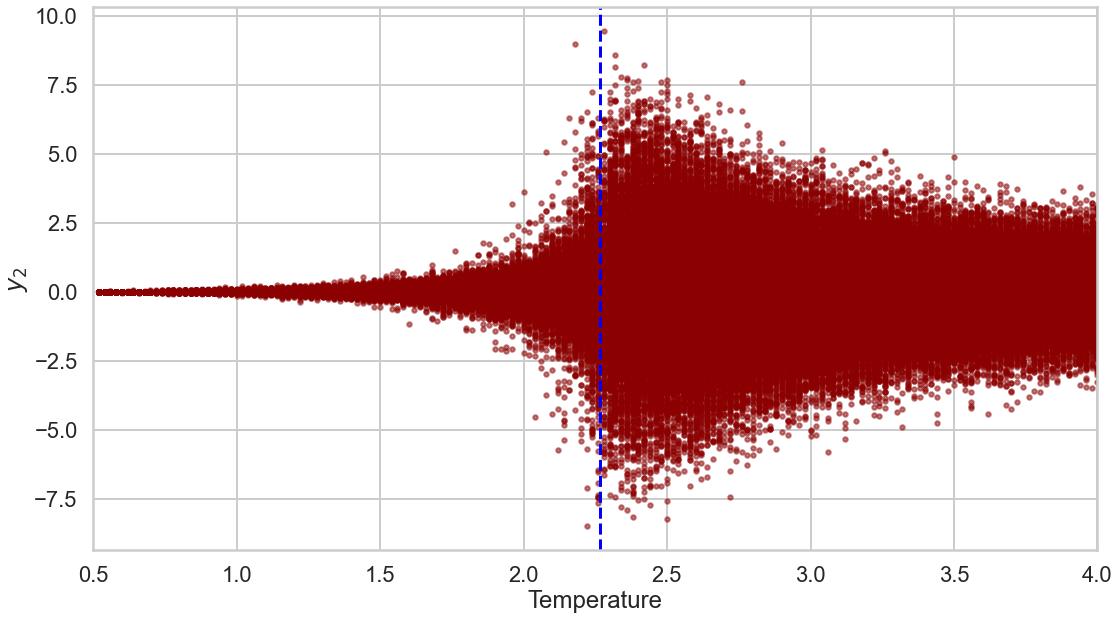

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,1], s=20, color="darkred", alpha=0.5)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="blue")
plt.savefig(f"pca_{index_}_2nd_comp_on_temperature.svg", bbox_inches="tight")

In [21]:
df = pd.DataFrame()
df["Temperature"] = val_set.iloc[:,0]
df["1st component"] = val_set_pca[:,0]
df["2nd component"] = val_set_pca[:,1]
df.to_csv(f"projections_{index_}.csv")

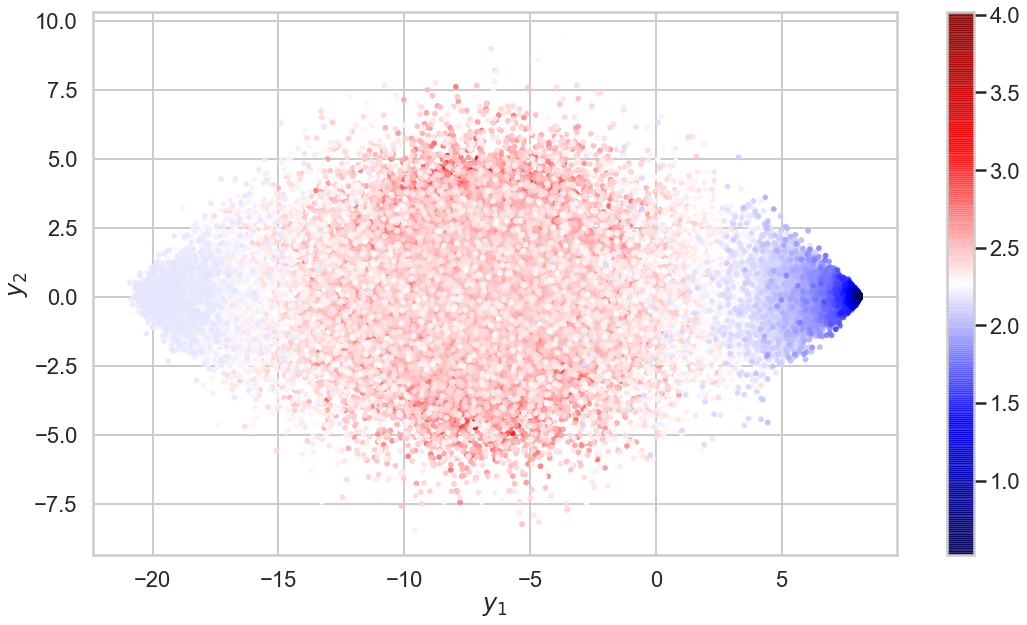

In [22]:
fig, ax = plt.subplots(figsize=(18,10))
p = ax.scatter(df["1st component"], df["2nd component"], c=df["Temperature"], cmap="seismic", s=15, alpha=0.8)
plt.colorbar(p)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel(r"$y_1$")
plt.savefig(f"pca_{index_}_projections.png", bbox_inches="tight")

# PCA --> 100 components

In [9]:
components = 100

pca100 = IncrementalPCA(components)
pca100.fit(X_train)

X_train_pca100 = pca100.transform(X_train).astype(np.float32)
X_test_pca100 = pca100.transform(X_test).astype(np.float32)

input_shape = (X_test_pca100.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca100, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca100, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 7s 7ms/step - loss: 6.5478 - categorical_accuracy: 0.9750 - val_loss: 0.0942 - val_categorical_accuracy: 0.9836

Epoch 00001: val_loss improved from inf to 0.09420, saving model to .\model_L30.h5
Epoch 2/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0877 - categorical_accuracy: 0.9816 - val_loss: 0.0811 - val_categorical_accuracy: 0.9794

Epoch 00002: val_loss improved from 0.09420 to 0.08106, saving model to .\model_L30.h5
Epoch 3/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0779 - categorical_accuracy: 0.9815 - val_loss: 0.0807 - val_categorical_accuracy: 0.9819

Epoch 00003: val_loss improved from 0.08106 to 0.08072, saving model to .\model_L30.h5
Epoch 4/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0713 - categorical_accuracy: 0.9827 - val_loss: 0.0689 - val_categorical_accuracy: 0.9840

Epoch 00004: val_loss improved from 0.08072 to 0.06885, saving model to

705/705 [==============================] - 5s 7ms/step - loss: 0.0491 - categorical_accuracy: 0.9848 - val_loss: 0.0505 - val_categorical_accuracy: 0.9841

Epoch 00034: val_loss did not improve from 0.04952
Epoch 35/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0480 - categorical_accuracy: 0.9851 - val_loss: 0.0492 - val_categorical_accuracy: 0.9845

Epoch 00035: val_loss improved from 0.04952 to 0.04919, saving model to .\model_L30.h5
Epoch 36/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0488 - categorical_accuracy: 0.9845 - val_loss: 0.0491 - val_categorical_accuracy: 0.9847

Epoch 00036: val_loss improved from 0.04919 to 0.04907, saving model to .\model_L30.h5
Epoch 37/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0497 - categorical_accuracy: 0.9844 - val_loss: 0.0492 - val_categorical_accuracy: 0.9846

Epoch 00037: val_loss did not improve from 0.04907
Epoch 38/100
705/705 [==============================] - 5s 8m

705/705 [==============================] - 5s 7ms/step - loss: 0.0468 - categorical_accuracy: 0.9854 - val_loss: 0.0481 - val_categorical_accuracy: 0.9847

Epoch 00066: val_loss did not improve from 0.04810
Epoch 67/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0467 - categorical_accuracy: 0.9851 - val_loss: 0.0481 - val_categorical_accuracy: 0.9847

Epoch 00067: val_loss improved from 0.04810 to 0.04810, saving model to .\model_L30.h5
Epoch 68/100
705/705 [==============================] - 5s 7ms/step - loss: 0.0470 - categorical_accuracy: 0.9853 - val_loss: 0.0481 - val_categorical_accuracy: 0.9848

Epoch 00068: val_loss did not improve from 0.04810
Epoch 69/100
705/705 [==============================] - 5s 8ms/step - loss: 0.0477 - categorical_accuracy: 0.9848 - val_loss: 0.0481 - val_categorical_accuracy: 0.9847

Epoch 00069: val_loss improved from 0.04810 to 0.04810, saving model to .\model_L30.h5

Epoch 00069: ReduceLROnPlateau reducing learning rate to 6.5

In [10]:
val_loss, val_acc = model2.evaluate(x=X_test_pca100, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0481 - categorical_accuracy: 0.9847
Validation loss: 0.0481
Validation accuracy: 0.985


In [11]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca100 = pca100.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred30_pca = generate_predictions(val_set, val_set_pca100, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


# PCA --> 600 components

In [12]:
components = 600

pca600 = IncrementalPCA(components)
pca600.fit(X_train)

X_train_pca600 = pca600.transform(X_train).astype(np.float32)
X_test_pca600 = pca600.transform(X_test).astype(np.float32)

input_shape = (X_test_pca600.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca600, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca600, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 7s 10ms/step - loss: 8.0496 - categorical_accuracy: 0.9774 - val_loss: 0.0990 - val_categorical_accuracy: 0.9772

Epoch 00001: val_loss did not improve from 0.04810
Epoch 2/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0951 - categorical_accuracy: 0.9805 - val_loss: 0.0886 - val_categorical_accuracy: 0.9841

Epoch 00002: val_loss did not improve from 0.04810
Epoch 3/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0845 - categorical_accuracy: 0.9825 - val_loss: 0.0796 - val_categorical_accuracy: 0.9813

Epoch 00003: val_loss did not improve from 0.04810
Epoch 4/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0802 - categorical_accuracy: 0.9822 - val_loss: 0.0812 - val_categorical_accuracy: 0.9818

Epoch 00004: val_loss did not improve from 0.04810
Epoch 5/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0758 - categorical_accuracy: 0.9829 - val_loss

705/705 [==============================] - 8s 11ms/step - loss: 0.0483 - categorical_accuracy: 0.9850 - val_loss: 0.0489 - val_categorical_accuracy: 0.9847

Epoch 00037: val_loss did not improve from 0.04810
Epoch 38/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0478 - categorical_accuracy: 0.9849 - val_loss: 0.0490 - val_categorical_accuracy: 0.9845

Epoch 00038: val_loss did not improve from 0.04810
Epoch 39/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0475 - categorical_accuracy: 0.9851 - val_loss: 0.0488 - val_categorical_accuracy: 0.9846

Epoch 00039: val_loss did not improve from 0.04810
Epoch 40/100
705/705 [==============================] - 8s 11ms/step - loss: 0.0472 - categorical_accuracy: 0.9855 - val_loss: 0.0488 - val_categorical_accuracy: 0.9846

Epoch 00040: val_loss did not improve from 0.04810
Epoch 41/100
705/705 [==============================] - 8s 12ms/step - loss: 0.0476 - categorical_accuracy: 0.9850 - val_loss: 0.

In [13]:
val_loss, val_acc = model2.evaluate(x=X_test_pca600, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 6ms/step - loss: 0.0484 - categorical_accuracy: 0.9847
Validation loss: 0.0484
Validation accuracy: 0.985


In [14]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca600 = pca600.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred30_pca600 = generate_predictions(val_set, val_set_pca600, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 2s 4ms/step
